In [1]:
import pandas as pd
import numpy as np
import sklearn
import scikitplot
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from scikitplot.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
import seaborn as sns
import plotly.graph_objs as go
import matplotlib.pyplot as plt
%matplotlib inline
import os
os.chdir('C:\\CICIDS')

In [2]:
datapath1 ="C:\\CICIDS\\Monday-WorkingHours.pcap_ISCX.csv"
df1 = pd.read_csv(datapath1)
datapath2 = "C:\\CICIDS\\Tuesday-WorkingHours.pcap_ISCX.csv"
df2 = pd.read_csv(datapath2)
datapath3 = "C:\\CICIDS\\Wednesday-workingHours.pcap_ISCX.csv"
df3 = pd.read_csv(datapath3)
datapath4 = "C:\\CICIDS\\Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv"
df4 = pd.read_csv(datapath4, encoding=('ISO-8859-1'),low_memory=False)
datapath5 = "C:\\CICIDS\\Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv"
df5 = pd.read_csv(datapath5)
datapath6 = "C:\\CICIDS\\Friday-WorkingHours-Morning.pcap_ISCX.csv"
df6 = pd.read_csv(datapath6)
datapath7 = "C:\\CICIDS\\Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv"
df7 = pd.read_csv(datapath7)
datapath8 = "C:\\CICIDS\\Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv"
df8 = pd.read_csv(datapath8)

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
nRowsRead = None

In [4]:
data = pd.concat([df1,df2])
del df1,df2
data = pd.concat([data,df3])
del df3
data = pd.concat([data,df4])
del df4
data = pd.concat([data,df5])
del df5
data = pd.concat([data,df6])
del df6
data = pd.concat([data,df7])
del df7
data = pd.concat ([data,df8])
del df8

In [5]:
data.head()

Flow ID      Source IP  Source Port  \
0   192.168.10.5-8.254.250.126-49188-80-6  8.254.250.126           80   
1   192.168.10.5-8.254.250.126-49188-80-6  8.254.250.126           80   
2   192.168.10.5-8.254.250.126-49188-80-6  8.254.250.126           80   
3   192.168.10.5-8.254.250.126-49188-80-6  8.254.250.126           80   
4  192.168.10.14-8.253.185.121-49486-80-6  8.253.185.121           80   

  Destination IP  Destination Port  Protocol      Timestamp  Flow Duration  \
0   192.168.10.5             49188         6  3/7/2017 8:55              4   
1   192.168.10.5             49188         6  3/7/2017 8:55              1   
2   192.168.10.5             49188         6  3/7/2017 8:55              1   
3   192.168.10.5             49188         6  3/7/2017 8:55              1   
4  192.168.10.14             49486         6  3/7/2017 8:56              3   

   Total Fwd Packets  Total Backward Packets  Total Length of Fwd Packets  \
0                  2                       0                         12.0   
1                  2                       0                         12.0   
2                  2                       0                         12.0   
3                  2                       0                         12.0   
4                  2                       0                         12.0   

   Total Length of Bwd Packets  Fwd Packet Length Max  Fwd Packet Length Min  \
0                          0.0                      6                      6   
1                          0.0                      6                      6   
2                          0.0                      6                      6   
3                          0.0                      6                      6   
4                          0.0                      6                      6   

   Fwd Packet Length Mean  Fwd Packet Length Std  Bwd Packet Length Max  \
0                     6.0                    0.0                      0   
1                     6.0                    0.0                      0   
2                     6.0                    0.0                      0   
3                     6.0                    0.0                      0   
4                     6.0                    0.0                      0   

   Bwd Packet Length Min  Bwd Packet Length Mean  Bwd Packet Length Std  \
0                      0                     0.0                    0.0   
1                      0                     0.0                    0.0   
2                      0                     0.0                    0.0   
3                      0                     0.0                    0.0   
4                      0                     0.0                    0.0   

   Flow Bytes/s  Flow Packets/s  Flow IAT Mean  Flow IAT Std  Flow IAT Max  \
0     3000000.0    5.000000e+05            4.0           0.0           4.0   
1    12000000.0    2.000000e+06            1.0           0.0           1.0   
2    12000000.0    2.000000e+06            1.0           0.0           1.0   
3    12000000.0    2.000000e+06            1.0           0.0           1.0   
4     4000000.0    6.666667e+05            3.0           0.0           3.0   

   Flow IAT Min  Fwd IAT Total  Fwd IAT Mean  Fwd IAT Std  Fwd IAT Max  \
0           4.0            4.0           4.0          0.0          4.0   
1           1.0            1.0           1.0          0.0          1.0   
2           1.0            1.0           1.0          0.0          1.0   
3           1.0            1.0           1.0          0.0          1.0   
4           3.0            3.0           3.0          0.0          3.0   

   Fwd IAT Min  Bwd IAT Total  Bwd IAT Mean  Bwd IAT Std  Bwd IAT Max  \
0          4.0            0.0           0.0          0.0          0.0   
1          1.0            0.0           0.0          0.0          0.0   
2          1.0            0.0           0.0          0.0          0.0   
3          1.0            0.0           0.0          0.0          0.0   
4

In [6]:
nRow, nCol = data.shape
print(f'jumlah Baris sebanyak {nRow} baris; jumlah kolom sebanyak {nCol} kolom')

jumlah Baris sebanyak 2830743 baris; jumlah kolom sebanyak 85 kolom


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2830743 entries, 0 to 225744
Data columns (total 85 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   Flow ID                      object 
 1   Source IP                    object 
 2   Source Port                  int64  
 3   Destination IP               object 
 4   Destination Port             int64  
 5   Protocol                     int64  
 6   Timestamp                    object 
 7   Flow Duration                int64  
 8   Total Fwd Packets            int64  
 9   Total Backward Packets       int64  
 10  Total Length of Fwd Packets  float64
 11  Total Length of Bwd Packets  float64
 12  Fwd Packet Length Max        int64  
 13  Fwd Packet Length Min        int64  
 14  Fwd Packet Length Mean       float64
 15  Fwd Packet Length Std        float64
 16  Bwd Packet Length Max        int64  
 17  Bwd Packet Length Min        int64  
 18  Bwd Packet Length Mean       float64
 19  B

In [8]:
kolom_label = data['Label'].value_counts()
kolom_label

BENIGN                        2273097
DoS Hulk                       231073
PortScan                       158930
DDoS                           128027
DoS GoldenEye                   10293
FTP-Patator                      7938
SSH-Patator                      5897
DoS slowloris                    5796
DoS Slowhttptest                 5499
Bot                              1966
Web Attack  Brute Force         1507
Web Attack  XSS                  652
Infiltration                       36
Web Attack  Sql Injection         21
Heartbleed                         11
Name: Label, dtype: int64

In [9]:
fig = go.Figure(go.Funnel(
    y=kolom_label.index,
    x=kolom_label.values,
))

fig.update_layout(
    title="Funnel Chart",
    margin=dict(l=0, r=0),
)

fig.show()


In [10]:
L = kolom_label.index
L

Index(['BENIGN', 'DoS Hulk', 'PortScan', 'DDoS', 'DoS GoldenEye',
       'FTP-Patator', 'SSH-Patator', 'DoS slowloris', 'DoS Slowhttptest',
       'Bot', 'Web Attack  Brute Force', 'Web Attack  XSS', 'Infiltration',
       'Web Attack  Sql Injection', 'Heartbleed'],
      dtype='object')

In [11]:
kol_lab = data['Label']
kol_lab = pd.DataFrame(kol_lab)
unsur_yang_diubah = ['DoS Hulk', 'PortScan', 'DDoS', 'DoS GoldenEye',
       'FTP-Patator', 'SSH-Patator', 'DoS slowloris', 'DoS Slowhttptest',
       'Bot', 'Web Attack  Brute Force', 'Web Attack  XSS', 'Infiltration',
       'Web Attack  Sql Injection', 'Heartbleed']
for unsur in unsur_yang_diubah:
    kol_lab['Label'] = kol_lab['Label'].replace(unsur, 'ATTACK')

ck = kol_lab['Label'].value_counts()

labels = ck.index
values = ck.values

fig = go.Figure(data=[go.Pie(labels=labels, values=values)])

fig.update_traces(
    textinfo="percent+label",
    marker=dict(
        colors=['#636EFA', '#A7AAF7'],
        line=dict(color='#FFFFFF', width=1)
    )
)

fig.update_layout(title_text="Perbandingan antara Benign dan Attack")
fig.show()


In [12]:
# Menghitung jumlah NaN dalam setiap kolom
nan_count = data.isna().sum()

# Membuat DataFrame yang berisi informasi jumlah NaN per kolom
nan_info = pd.DataFrame({'Kolom': nan_count.index, 'Jumlah NaN': nan_count.values})

# Menampilkan keseluruhan DataFrame
print(nan_info)

                          Kolom  Jumlah NaN
0                       Flow ID           0
1                     Source IP           0
2                   Source Port           0
3                Destination IP           0
4              Destination Port           0
5                      Protocol           0
6                     Timestamp           0
7                 Flow Duration           0
8             Total Fwd Packets           0
9        Total Backward Packets           0
10  Total Length of Fwd Packets           0
11  Total Length of Bwd Packets           0
12        Fwd Packet Length Max           0
13        Fwd Packet Length Min           0
14       Fwd Packet Length Mean           0
15        Fwd Packet Length Std           0
16        Bwd Packet Length Max           0
17        Bwd Packet Length Min           0
18       Bwd Packet Length Mean           0
19        Bwd Packet Length Std           0
20                 Flow Bytes/s        1358
21               Flow Packets/s 

In [13]:
jumlah_nan_true = data.isna().sum().sum()
jumlah_nan_false = data[data.notna().all(axis=1)].shape[0]

print("Jumlah NaN dalam dataset:", jumlah_nan_true)
print("Jumlah non-NaN dalam dataset:", jumlah_nan_false)

Jumlah NaN dalam dataset: 1358
Jumlah non-NaN dalam dataset: 2829385


In [14]:
data_yg_mengandung_null = data[data.isnull().any(axis=1)]

mk = data_yg_mengandung_null['Label'].value_counts()

labels = mk.index
values = mk.values

fig = go.Figure(data=[go.Pie(labels=labels, values=values)])

fig.update_traces(
    textinfo="percent+label",
    marker=dict(
        colors=['#90AFC5', '#336B87'],
        line=dict(color='#FFFFFF', width=1)
    )
)

fig.update_layout(title_text="_")
fig.show()

In [15]:
# Menghitung jumlah 'inf' dalam setiap kolom
inf_count = data.applymap(lambda x: str(x) == 'inf')

# Menggabungkan informasi jumlah 'inf' dengan nama kolom
inf_info = pd.DataFrame({'Kolom': inf_count.sum().index, 'Jumlah "inf"': inf_count.sum().values})

# Menampilkan keseluruhan DataFrame
print(inf_info)

                          Kolom  Jumlah "inf"
0                       Flow ID             0
1                     Source IP             0
2                   Source Port             0
3                Destination IP             0
4              Destination Port             0
5                      Protocol             0
6                     Timestamp             0
7                 Flow Duration             0
8             Total Fwd Packets             0
9        Total Backward Packets             0
10  Total Length of Fwd Packets             0
11  Total Length of Bwd Packets             0
12        Fwd Packet Length Max             0
13        Fwd Packet Length Min             0
14       Fwd Packet Length Mean             0
15        Fwd Packet Length Std             0
16        Bwd Packet Length Max             0
17        Bwd Packet Length Min             0
18       Bwd Packet Length Mean             0
19        Bwd Packet Length Std             0
20                 Flow Bytes/s   

In [16]:
# mengubah data yang berkarakter 'inf' menjadi data yang bernilai inf
kolom_yg_mengandung_nilai_infinity = ['Flow Packets/s', 'Flow Bytes/s']

for kolom in kolom_yg_mengandung_nilai_infinity:
    data[kolom] = data[kolom].replace('inf', float('inf'))

kolom_yang_infinity = np.isinf(data[kolom])

data_yg_mengandung_infinity = data[data[kolom].isin([np.inf, np.inf])]

In [17]:
# menggabungkan data Nan dan inf
data = data.replace([np.inf, -np.inf], np.nan)

mising_value = data[data.isnull().any(axis=1)]

non_missing_valua = data[data.notna().all(axis=1)].shape[0]

In [18]:
# perbandingan data yang missing dan non missing
ms = len(mising_value)
nms = non_missing_valua

print("Jumlah missing dalam dataset:", ms)
print("Jumlah non-missing dalam dataset:", nms)

Jumlah missing dalam dataset: 2867
Jumlah non-missing dalam dataset: 2827876


In [19]:
# Data
labels = ['Missing', 'non-Missing']
values = [ms, nms]

# Buat pie chart
fig = go.Figure(data=[go.Pie(labels=labels, values=values)])

# Menyesuaikan tampilan pie chart
fig.update_traces(
    textinfo="percent+label",
    marker=dict(
        colors=["#f47a60", "#7fe7dc",],
        line=dict(color='#FFFFFF', width=0.5)
    )
)

fig.update_layout(title_text="missing and non missing value")

# Tampilkan pie chart
fig.show()


In [20]:
# membersihkan missing value
data_clean = data.dropna()

# data yang sudah bersih dari missing value
data_clean.shape

(2827876, 85)

In [21]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2827876 entries, 0 to 225744
Data columns (total 85 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   Flow ID                      object 
 1   Source IP                    object 
 2   Source Port                  int64  
 3   Destination IP               object 
 4   Destination Port             int64  
 5   Protocol                     int64  
 6   Timestamp                    object 
 7   Flow Duration                int64  
 8   Total Fwd Packets            int64  
 9   Total Backward Packets       int64  
 10  Total Length of Fwd Packets  float64
 11  Total Length of Bwd Packets  float64
 12  Fwd Packet Length Max        int64  
 13  Fwd Packet Length Min        int64  
 14  Fwd Packet Length Mean       float64
 15  Fwd Packet Length Std        float64
 16  Bwd Packet Length Max        int64  
 17  Bwd Packet Length Min        int64  
 18  Bwd Packet Length Mean       float64
 19  B

In [22]:
pt = data_clean['Protocol'].value_counts()

pt

6     1826704
17     999476
0        1696
Name: Protocol, dtype: int64

In [23]:
# membersihkan kolom yg tidak diperlukan
kolom_yg_dhapus = ['Flow ID', 'Source IP', 'Source Port', 'Destination IP', 'Protocol', 'Timestamp']

for kolomh in kolom_yg_dhapus :
    del data_clean[kolomh]

In [24]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2827876 entries, 0 to 225744
Data columns (total 79 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   Destination Port             int64  
 1   Flow Duration                int64  
 2   Total Fwd Packets            int64  
 3   Total Backward Packets       int64  
 4   Total Length of Fwd Packets  float64
 5   Total Length of Bwd Packets  float64
 6   Fwd Packet Length Max        int64  
 7   Fwd Packet Length Min        int64  
 8   Fwd Packet Length Mean       float64
 9   Fwd Packet Length Std        float64
 10  Bwd Packet Length Max        int64  
 11  Bwd Packet Length Min        int64  
 12  Bwd Packet Length Mean       float64
 13  Bwd Packet Length Std        float64
 14  Flow Bytes/s                 float64
 15  Flow Packets/s               float64
 16  Flow IAT Mean                float64
 17  Flow IAT Std                 float64
 18  Flow IAT Max                 float64
 19  F

In [25]:
# memeriksa data duplikat
data_dupl = data_clean[data_clean.duplicated(keep=False)]

dp = len(data_dupl)

print(dp)

430301


In [26]:
data_dupl.tail()

Destination Port  Flow Duration  Total Fwd Packets  \
225687               137              4                  2   
225696                53            184                  2   
225698                53            168                  2   
225706                53            176                  2   
225708               123            125                  2   

        Total Backward Packets  Total Length of Fwd Packets  \
225687                       0                        124.0   
225696                       2                         84.0   
225698                       2                         72.0   
225706                       2                        142.0   
225708                       2                         96.0   

        Total Length of Bwd Packets  Fwd Packet Length Max  \
225687                          0.0                     62   
225696                        310.0                     42   
225698                        194.0                     36   
225706                        242.0                     71   
225708                         96.0                     48   

        Fwd Packet Length Min  Fwd Packet Length Mean  Fwd Packet Length Std  \
225687                     62                    62.0                    0.0   
225696                     42                    42.0                    0.0   
225698                     36                    36.0                    0.0   
225706                     71                    71.0                    0.0   
225708                     48                    48.0                    0.0   

        Bwd Packet Length Max  Bwd Packet Length Min  Bwd Packet Length Mean  \
225687                      0                      0                     0.0   
225696                    155                    155                   155.0   
225698                     97                     97                    97.0   
225706                    121                    121                   121.0   
225708                     48                     48                    48.0   

        Bwd Packet Length Std  Flow Bytes/s  Flow Packets/s  Flow IAT Mean  \
225687                    0.0  3.100000e+07    500000.00000       4.000000   
225696                    0.0  2.141304e+06     21739.13043      61.333333   
225698                    0.0  1.583333e+06     23809.52381      56.000000   
225706                    0.0  2.181818e+06     22727.27273      58.666667   
225708                    0.0  1.536000e+06     32000.00000      41.666667   

        Flow IAT Std  Flow IAT Max  Flow IAT Min  Fwd IAT Total  Fwd IAT Mean  \
225687      0.000000           4.0           4.0            4.0           4.0   
225696    100.171520         177.0           3.0            3.0           3.0   
225698     57.419509         117.0           3.0            3.0           3.0   
225706     96.417495         170.0           3.0            3.0           3.0   
225708     66.972631         119.0           3.0            3.0           3.0   

        Fwd IAT Std  Fwd IAT Max  Fwd IAT Min  Bwd IAT Total  Bwd IAT Mean  \
225687          0.0          4.0          4.0            0.0           0.0   
225696          0.0          3.0          3.0            4.0           4.0   
225698          0.0          3.0          3.0           48.0          48.0   
225706          0.0          3.0          3.0            3.0           3.0   
225708          0.0          3.0          3.0            3.0           3.0   

        Bwd IAT Std  Bwd IAT Max  Bwd IAT Min  Fwd PSH Flags  Bwd PSH Flags  \
225687          0.0          0.0          0.0              0              0   
225696          0.0          4.0          4.0              0              0   
225698          0.0         48.0         48.0              0              0   
225706          0.0          3.0          3.0              0              0   
225708          0.0          3.0          3.0              0              0   

        Fwd URG Flags

In [27]:
# memeriksa baris data duplikat
data_dupls = data_clean[data_clean.duplicated()]

# baris data yg duplikat
data_dupls.head()

Destination Port  Flow Duration  Total Fwd Packets  \
2              49188              1                  2   
3              49188              1                  2   
6              49486              1                  2   
7              49486              1                  2   
46               389              1                  2   

    Total Backward Packets  Total Length of Fwd Packets  \
2                        0                         12.0   
3                        0                         12.0   
6                        0                         12.0   
7                        0                         12.0   
46                       0                          7.0   

    Total Length of Bwd Packets  Fwd Packet Length Max  Fwd Packet Length Min  \
2                           0.0                      6                      6   
3                           0.0                      6                      6   
6                           0.0                      6                      6   
7                           0.0                      6                      6   
46                          0.0                      7                      0   

    Fwd Packet Length Mean  Fwd Packet Length Std  Bwd Packet Length Max  \
2                      6.0               0.000000                      0   
3                      6.0               0.000000                      0   
6                      6.0               0.000000                      0   
7                      6.0               0.000000                      0   
46                     3.5               4.949747                      0   

    Bwd Packet Length Min  Bwd Packet Length Mean  Bwd Packet Length Std  \
2                       0                     0.0                    0.0   
3                       0                     0.0                    0.0   
6                       0                     0.0                    0.0   
7                       0                     0.0                    0.0   
46                      0                     0.0                    0.0   

    Flow Bytes/s  Flow Packets/s  Flow IAT Mean  Flow IAT Std  Flow IAT Max  \
2     12000000.0       2000000.0            1.0           0.0           1.0   
3     12000000.0       2000000.0            1.0           0.0           1.0   
6     12000000.0       2000000.0            1.0           0.0           1.0   
7     12000000.0       2000000.0            1.0           0.0           1.0   
46     7000000.0       2000000.0            1.0           0.0           1.0   

    Flow IAT Min  Fwd IAT Total  Fwd IAT Mean  Fwd IAT Std  Fwd IAT Max  \
2            1.0            1.0           1.0          0.0          1.0   
3            1.0            1.0           1.0          0.0          1.0   
6            1.0            1.0           1.0          0.0          1.0   
7            1.0            1.0           1.0          0.0          1.0   
46           1.0            1.0           1.0          0.0          1.0   

    Fwd IAT Min  Bwd IAT Total  Bwd IAT Mean  Bwd IAT Std  Bwd IAT Max  \
2           1.0            0.0           0.0          0.0          0.0   
3           1.0            0.0           0.0          0.0          0.0   
6           1.0            0.0           0.0          0.0          0.0   
7           1.0            0.0           0.0          0.0          0.0   
46          1.0            0.0           0.0          0.0          0.0   

    Bwd IAT Min  Fwd PSH Flags  Bwd PSH Flags  Fwd URG Flags  Bwd URG Flags  \
2           0.0              0              0              0              0   
3           0.0              0              0              0              0   
6           0.0              0              0              0              0   
7           0.0              0              0              0              0   
46          0.0              1              0              0              0   

    Fwd Header Length  Bwd Header Length  Fwd Packets

In [28]:
# jumlah duplikat data dan non duplikat
data_dup = data_clean.duplicated().value_counts()

data_dup

False    2497676
True      330200
dtype: int64

In [29]:
# Data
labels = data_dup.index
values = data_dup.values

# Buat pie chart
fig = go.Figure(data=[go.Pie(labels=labels, values=values)])

# Menyesuaikan tampilan pie chart
fig.update_traces(
    textinfo="percent+label",
    marker=dict(
        colors=["#DF678C", "#3D155F",],
        line=dict(color='#FFFFFF', width=0.5)
    )
)

fig.update_layout(title_text="duplikat & non duplikat")

# Tampilkan pie chart
fig.show()


In [30]:
# membersihkan data yg duplikat
data_clean.drop_duplicates(inplace=True)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_13656\3747414899.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [31]:
data_clean.shape

(2497676, 79)

In [32]:
# hapus kolom duplikat
del data_clean['Fwd Header Length.1']

data_clean.shape

(2497676, 78)

In [33]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2497676 entries, 0 to 225744
Data columns (total 78 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   Destination Port             int64  
 1   Flow Duration                int64  
 2   Total Fwd Packets            int64  
 3   Total Backward Packets       int64  
 4   Total Length of Fwd Packets  float64
 5   Total Length of Bwd Packets  float64
 6   Fwd Packet Length Max        int64  
 7   Fwd Packet Length Min        int64  
 8   Fwd Packet Length Mean       float64
 9   Fwd Packet Length Std        float64
 10  Bwd Packet Length Max        int64  
 11  Bwd Packet Length Min        int64  
 12  Bwd Packet Length Mean       float64
 13  Bwd Packet Length Std        float64
 14  Flow Bytes/s                 float64
 15  Flow Packets/s               float64
 16  Flow IAT Mean                float64
 17  Flow IAT Std                 float64
 18  Flow IAT Max                 float64
 19  F

In [34]:
korelasi_data = data_clean.corr()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_13656\4212775778.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



In [35]:
korelasi_data

Destination Port  Flow Duration  \
Destination Port                     1.000000      -0.173877   
Flow Duration                       -0.173877       1.000000   
Total Fwd Packets                   -0.004695       0.020544   
Total Backward Packets              -0.004394       0.019366   
Total Length of Fwd Packets          0.009477       0.063343   
Total Length of Bwd Packets         -0.003419       0.015981   
Fwd Packet Length Max                0.090423       0.262566   
Fwd Packet Length Min               -0.046065      -0.115018   
Fwd Packet Length Mean               0.136910       0.133495   
Fwd Packet Length Std                0.122524       0.224078   
Bwd Packet Length Max               -0.214738       0.484794   
Bwd Packet Length Min               -0.261911      -0.238513   
Bwd Packet Length Mean              -0.240833       0.447411   
Bwd Packet Length Std               -0.192450       0.432548   
Flow Bytes/s                         0.070321      -0.024928   
Flow Packets/s                       0.359653      -0.110335   
Flow IAT Mean                       -0.114900       0.534223   
Flow IAT Std                        -0.133540       0.734430   
Flow IAT Max                        -0.132520       0.779575   
Flow IAT Min                        -0.023600       0.060380   
Fwd IAT Total                       -0.173016       0.998526   
Fwd IAT Mean                        -0.108227       0.542581   
Fwd IAT Std                         -0.112500       0.720635   
Fwd IAT Max                         -0.131217       0.779318   
Fwd IAT Min                         -0.056039       0.209512   
Bwd IAT Total                       -0.121358       0.819623   
Bwd IAT Mean                        -0.076734       0.408185   
Bwd IAT Std                         -0.042569       0.517280   
Bwd IAT Max                         -0.062743       0.579842   
Bwd IAT Min                         -0.055626       0.212468   
Fwd PSH Flags                        0.234408      -0.017442   
Bwd PSH Flags                             NaN            NaN   
Fwd URG Flags                        0.004436      -0.002680   
Bwd URG Flags                             NaN            NaN   
Fwd Header Length                    0.000462      -0.000091   
Bwd Header Length                    0.000768      -0.001042   
Fwd Packets/s                        0.348737      -0.100047   
Bwd Packets/s                        0.144848      -0.080310   
Min Packet Length                   -0.253890      -0.246258   
Max Packet Length                   -0.145416       0.500428   
Packet Length Mean                  -0.173263       0.416048   
Packet Length Std                   -0.141429       0.443989   
Packet Length Variance              -0.078732       0.270932   
FIN Flag Count                      -0.038278       0.217935   
SYN Flag Count                       0.234408      -0.017442   
RST Flag Count                      -0.007201       0.008007   
PSH Flag Count                      -0.220909       0.177430   
ACK Flag Count                       0.586633       0.032749   
URG Flag Count                       0.525049      -0.118388   
CWE Flag Count                       0.004436      -0.002680   
ECE Flag Count                      -0.007112       0.007955   
Down/Up Ratio                        0.029136      -0.165489   
Average Packet Size                 -0.174613       0.393604   
Avg Fwd Segment Size                 0.136910       0.133495   
Avg Bwd Segment Size                -0.240833       0.447411   
Fwd Avg Bytes/Bulk                        NaN            NaN   
Fwd Avg Packets/Bulk                      NaN            NaN   
Fwd Avg Bulk Rate                         NaN            NaN   
Bwd Avg Bytes/Bulk                        NaN            NaN   
Bwd Avg Packets/Bulk                      NaN            NaN   
Bwd Avg Bulk Rate                         NaN            NaN   
Subflow Fwd Packets                 -0.004695       0.020544 

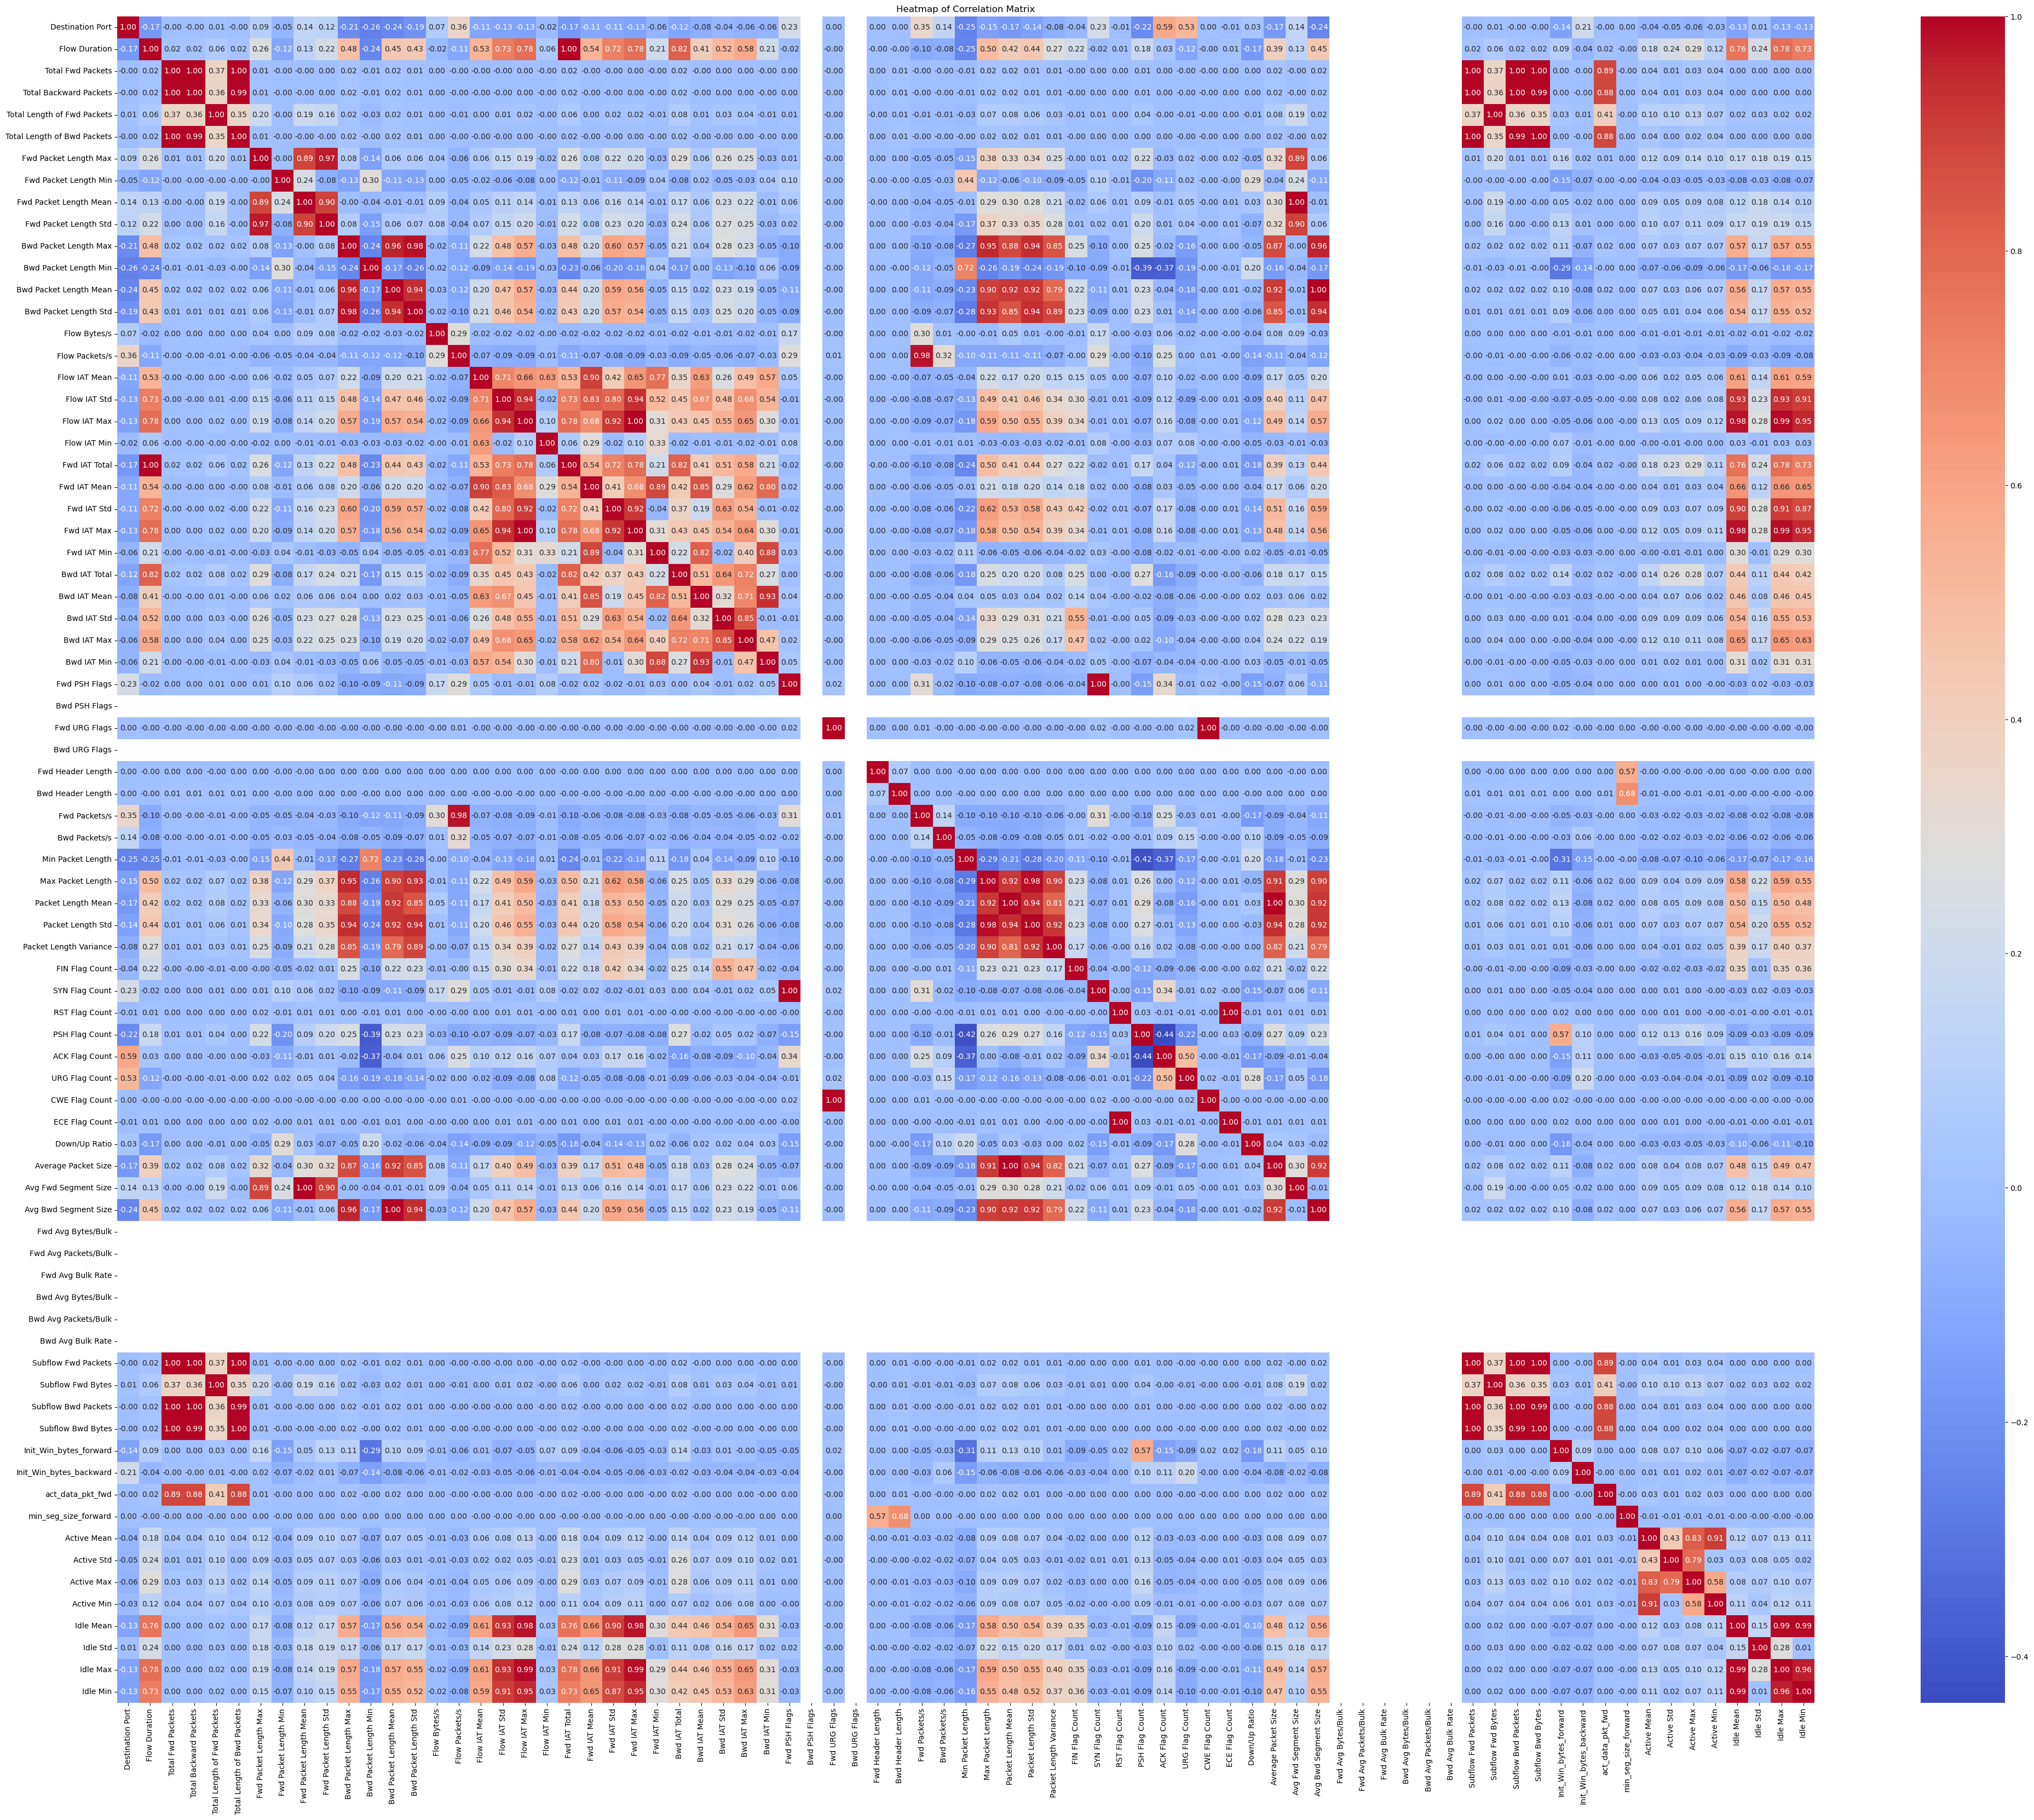

In [36]:
plt.figure(figsize=(50, 40))
sns.heatmap(korelasi_data, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap of Correlation Matrix')
plt.savefig('heatmap_korelasi.png')
plt.show()

In [37]:
# membersihkan kolom yg putih
kolom_yg_dhapus = ['Bwd PSH Flags', 'Bwd URG Flags', 'Fwd Avg Bytes/Bulk', 'Fwd Avg Packets/Bulk', 'Fwd Avg Bulk Rate', 'Bwd Avg Bytes/Bulk', 'Bwd Avg Packets/Bulk', 'Bwd Avg Bulk Rate']

for kolomo in kolom_yg_dhapus :
    del data_clean[kolomo]

In [38]:
korelasi_data = data_clean.corr()

korelasi_data

C:\Users\ASUS\AppData\Local\Temp\ipykernel_13656\1152232200.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



Destination Port  Flow Duration  \
Destination Port                     1.000000      -0.173877   
Flow Duration                       -0.173877       1.000000   
Total Fwd Packets                   -0.004695       0.020544   
Total Backward Packets              -0.004394       0.019366   
Total Length of Fwd Packets          0.009477       0.063343   
Total Length of Bwd Packets         -0.003419       0.015981   
Fwd Packet Length Max                0.090423       0.262566   
Fwd Packet Length Min               -0.046065      -0.115018   
Fwd Packet Length Mean               0.136910       0.133495   
Fwd Packet Length Std                0.122524       0.224078   
Bwd Packet Length Max               -0.214738       0.484794   
Bwd Packet Length Min               -0.261911      -0.238513   
Bwd Packet Length Mean              -0.240833       0.447411   
Bwd Packet Length Std               -0.192450       0.432548   
Flow Bytes/s                         0.070321      -0.024928   
Flow Packets/s                       0.359653      -0.110335   
Flow IAT Mean                       -0.114900       0.534223   
Flow IAT Std                        -0.133540       0.734430   
Flow IAT Max                        -0.132520       0.779575   
Flow IAT Min                        -0.023600       0.060380   
Fwd IAT Total                       -0.173016       0.998526   
Fwd IAT Mean                        -0.108227       0.542581   
Fwd IAT Std                         -0.112500       0.720635   
Fwd IAT Max                         -0.131217       0.779318   
Fwd IAT Min                         -0.056039       0.209512   
Bwd IAT Total                       -0.121358       0.819623   
Bwd IAT Mean                        -0.076734       0.408185   
Bwd IAT Std                         -0.042569       0.517280   
Bwd IAT Max                         -0.062743       0.579842   
Bwd IAT Min                         -0.055626       0.212468   
Fwd PSH Flags                        0.234408      -0.017442   
Fwd URG Flags                        0.004436      -0.002680   
Fwd Header Length                    0.000462      -0.000091   
Bwd Header Length                    0.000768      -0.001042   
Fwd Packets/s                        0.348737      -0.100047   
Bwd Packets/s                        0.144848      -0.080310   
Min Packet Length                   -0.253890      -0.246258   
Max Packet Length                   -0.145416       0.500428   
Packet Length Mean                  -0.173263       0.416048   
Packet Length Std                   -0.141429       0.443989   
Packet Length Variance              -0.078732       0.270932   
FIN Flag Count                      -0.038278       0.217935   
SYN Flag Count                       0.234408      -0.017442   
RST Flag Count                      -0.007201       0.008007   
PSH Flag Count                      -0.220909       0.177430   
ACK Flag Count                       0.586633       0.032749   
URG Flag Count                       0.525049      -0.118388   
CWE Flag Count                       0.004436      -0.002680   
ECE Flag Count                      -0.007112       0.007955   
Down/Up Ratio                        0.029136      -0.165489   
Average Packet Size                 -0.174613       0.393604   
Avg Fwd Segment Size                 0.136910       0.133495   
Avg Bwd Segment Size                -0.240833       0.447411   
Subflow Fwd Packets                 -0.004695       0.020544   
Subflow Fwd Bytes                    0.009490       0.063426   
Subflow Bwd Packets                 -0.004394       0.019366   
Subflow Bwd Bytes                   -0.003419       0.015980   
Init_Win_bytes_forward              -0.135038       0.092673   
Init_Win_bytes_backward              0.205433      -0.035393   
act_data_pkt_fwd                    -0.003574       0.015709   
min_seg_size_forward                 0.001014      -0.001225   
Active Mean                         -0.041190       0.184577 

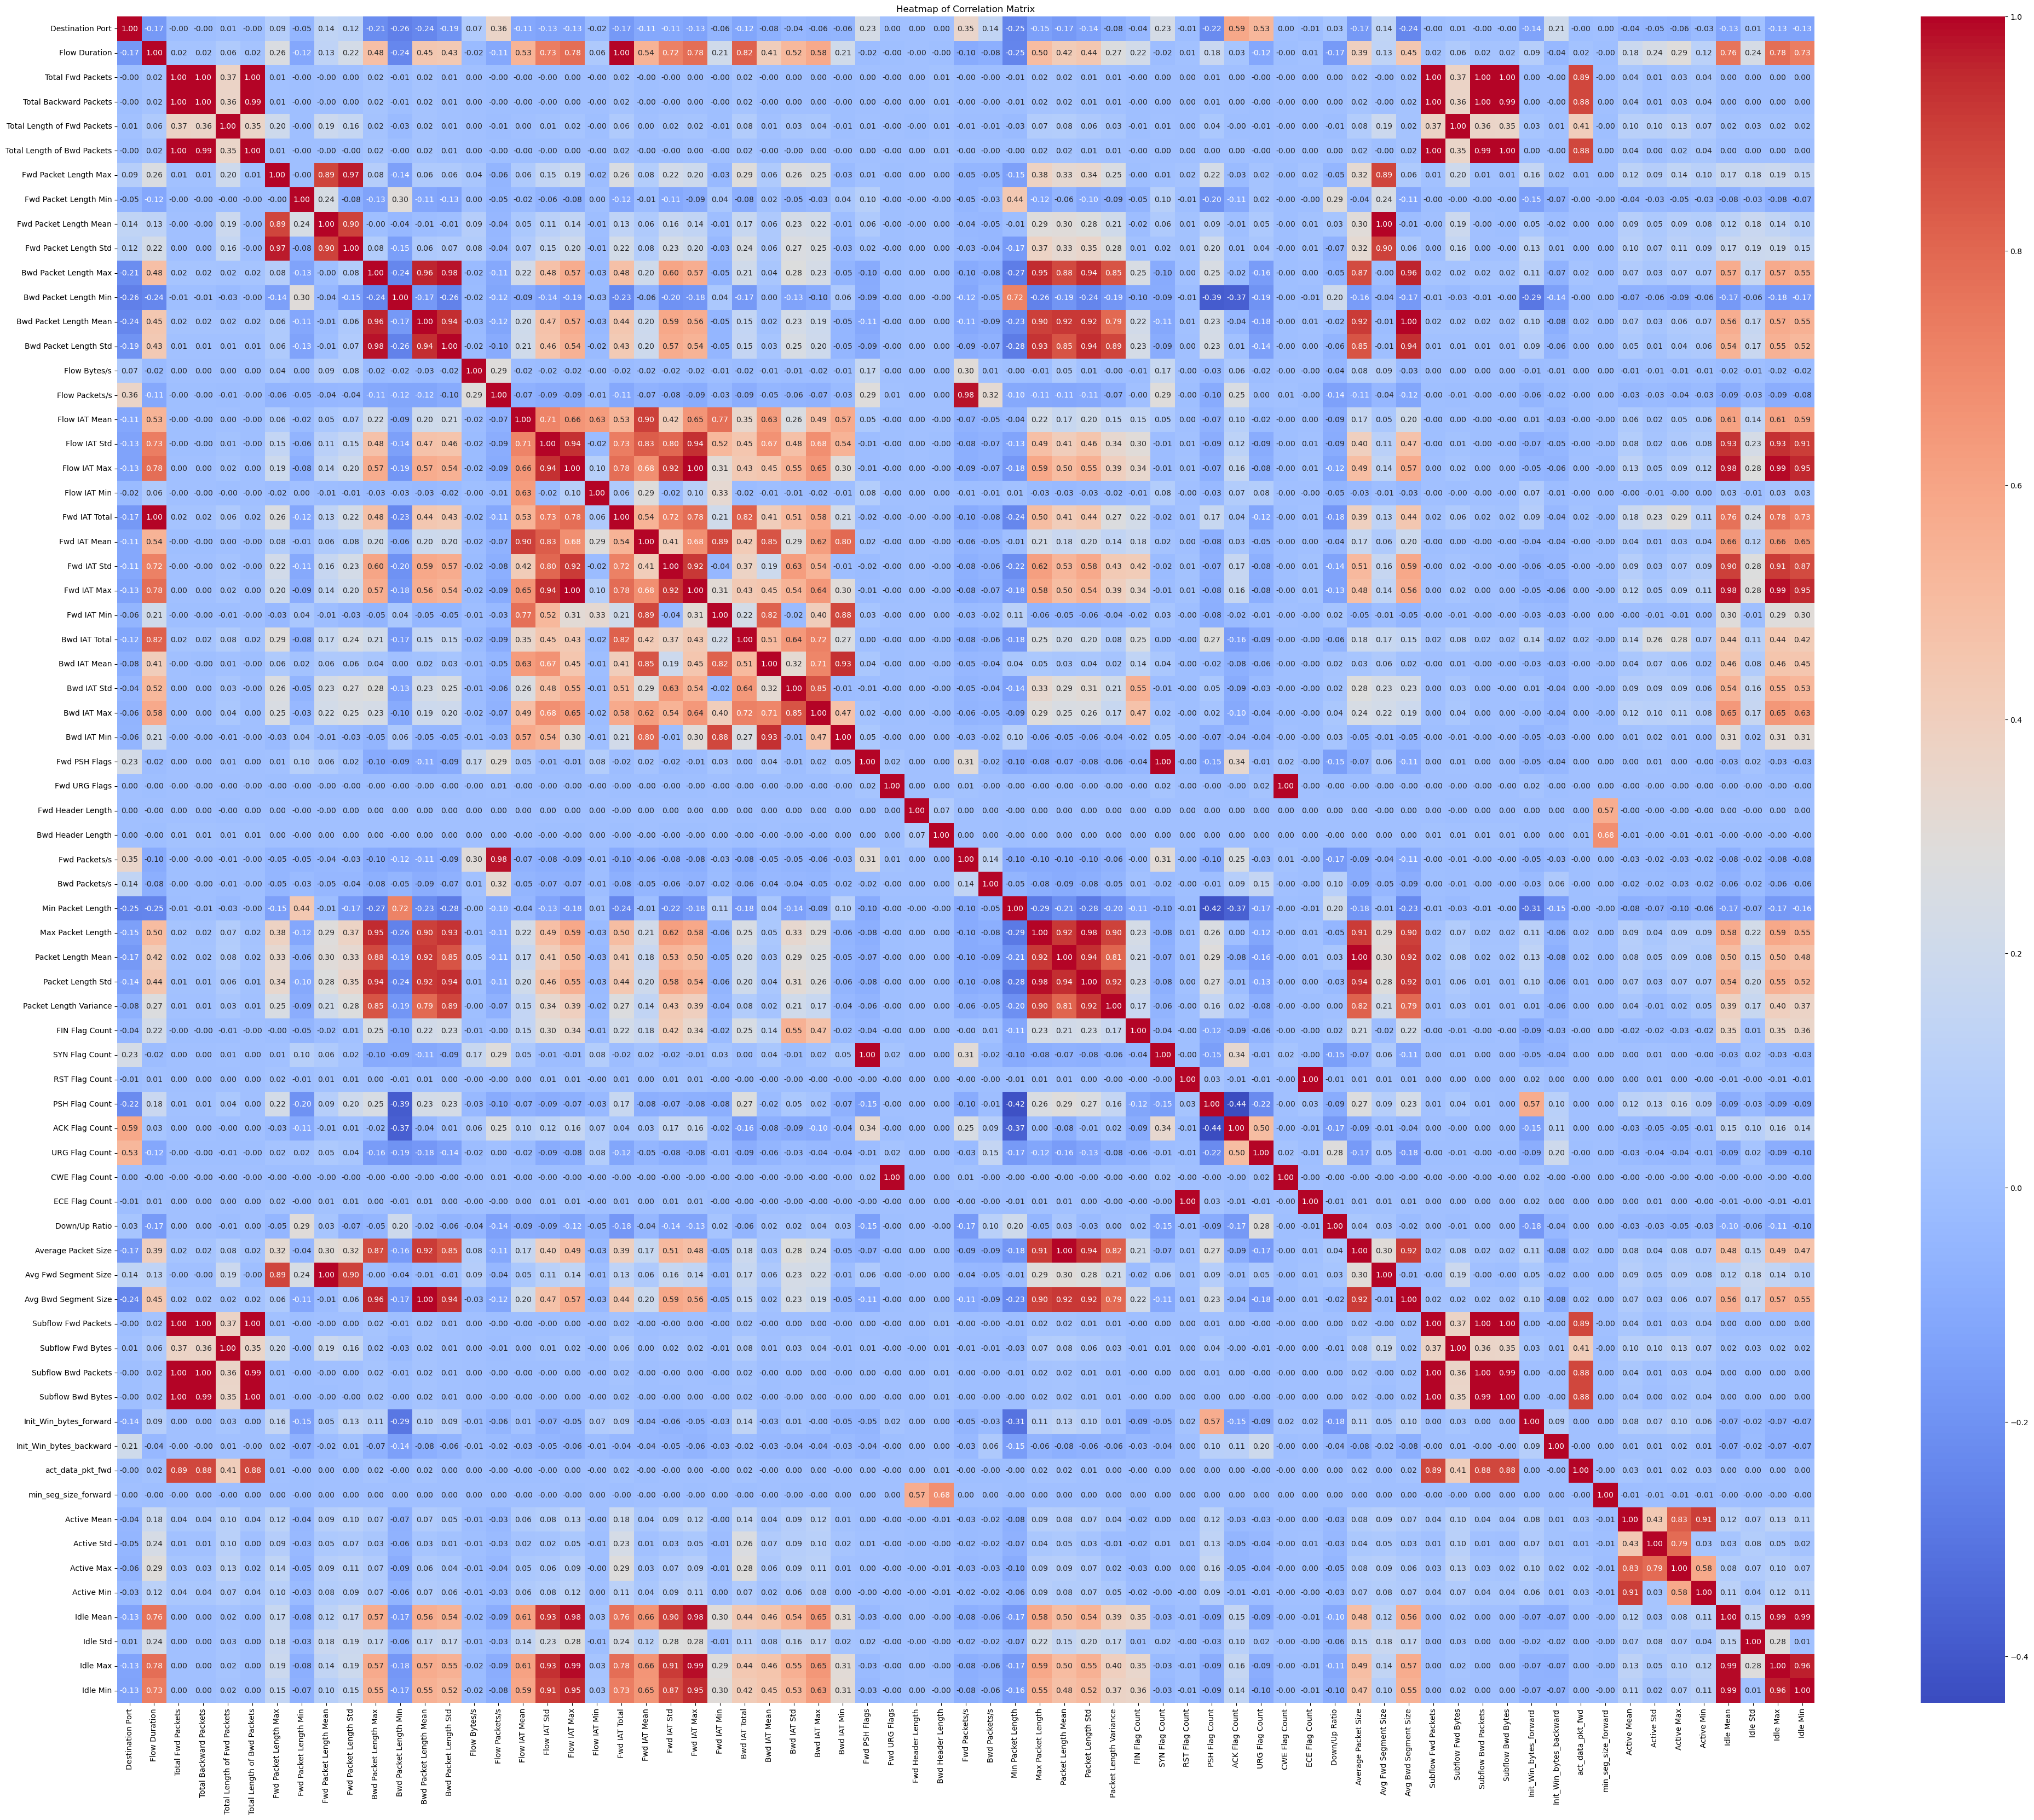

In [39]:
plt.figure(figsize=(50, 40))
sns.heatmap(korelasi_data, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap of Correlation Matrix')
plt.savefig('heatmap_korelasi.png')
plt.show()

In [40]:
kolom_label = data_clean['Label'].value_counts()

kolom_label

BENIGN                        2071935
DoS Hulk                       172846
DDoS                           128014
PortScan                        90694
DoS GoldenEye                   10286
FTP-Patator                      5931
DoS slowloris                    5385
DoS Slowhttptest                 5228
SSH-Patator                      3219
Bot                              1948
Web Attack  Brute Force         1470
Web Attack  XSS                  652
Infiltration                       36
Web Attack  Sql Injection         21
Heartbleed                         11
Name: Label, dtype: int64

In [41]:
fig = go.Figure(go.Funnel(
    y=kolom_label.index,
    x=kolom_label.values,
))

fig.update_layout(
    title="Daftar Serangan by Funnel Chart",
    margin=dict(l=0, r=0),
)

fig.show()


In [42]:
kol_lab = data_clean['Label']
kol_lab = pd.DataFrame(kol_lab)
unsur_yang_diubah = ['DoS Hulk', 'PortScan', 'DDoS', 'DoS GoldenEye',
       'FTP-Patator', 'SSH-Patator', 'DoS slowloris', 'DoS Slowhttptest',
       'Bot', 'Web Attack  Brute Force', 'Web Attack  XSS', 'Infiltration',
       'Web Attack  Sql Injection', 'Heartbleed']
for unsur in unsur_yang_diubah:
    kol_lab['Label'] = kol_lab['Label'].replace(unsur, 'ATTACK')

ck = kol_lab['Label'].value_counts()

labels = ck.index
values = ck.values

fig = go.Figure(data=[go.Pie(labels=labels, values=values)])

fig.update_traces(
    textinfo="percent+label",
    marker=dict(
        colors=['#F9D342', '#292826'],
        line=dict(color='#FFFFFF', width=1)
    )
)

fig.update_layout(title_text="Perbandingan antara Benign dan Attack")
fig.show()


In [43]:
data_clean.columns

Index(['Destination Port', 'Flow Duration', 'Total Fwd Packets',
       'Total Backward Packets', 'Total Length of Fwd Packets',
       'Total Length of Bwd Packets', 'Fwd Packet Length Max',
       'Fwd Packet Length Min', 'Fwd Packet Length Mean',
       'Fwd Packet Length Std', 'Bwd Packet Length Max',
       'Bwd Packet Length Min', 'Bwd Packet Length Mean',
       'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s',
       'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min',
       'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max',
       'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std',
       'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Fwd URG Flags',
       'Fwd Header Length', 'Bwd Header Length', 'Fwd Packets/s',
       'Bwd Packets/s', 'Min Packet Length', 'Max Packet Length',
       'Packet Length Mean', 'Packet Length Std', 'Packet Length Variance',
       'FIN Flag Count', 'SYN Flag Count', 'RST Flag Count', 'PSH Flag Count',

In [44]:
data_clean.columns = data_clean.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

data_clean.head()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_13656\3188535930.py:1: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.

C:\Users\ASUS\AppData\Local\Temp\ipykernel_13656\3188535930.py:1: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.



destination_port  flow_duration  total_fwd_packets  total_backward_packets  \
0             49188              4                  2                       0   
1             49188              1                  2                       0   
4             49486              3                  2                       0   
5             49486              1                  2                       0   
8                88            609                  7                       4   

   total_length_of_fwd_packets  total_length_of_bwd_packets  \
0                         12.0                          0.0   
1                         12.0                          0.0   
4                         12.0                          0.0   
5                         12.0                          0.0   
8                        484.0                        414.0   

   fwd_packet_length_max  fwd_packet_length_min  fwd_packet_length_mean  \
0                      6                      6                6.000000   
1                      6                      6                6.000000   
4                      6                      6                6.000000   
5                      6                      6                6.000000   
8                    233                      0               69.142857   

   fwd_packet_length_std  bwd_packet_length_max  bwd_packet_length_min  \
0               0.000000                      0                      0   
1               0.000000                      0                      0   
4               0.000000                      0                      0   
5               0.000000                      0                      0   
8             111.967895                    207                      0   

   bwd_packet_length_mean  bwd_packet_length_std  flow_bytes/s  \
0                     0.0               0.000000    3000000.00   
1                     0.0               0.000000   12000000.00   
4                     0.0               0.000000    4000000.00   
5                     0.0               0.000000   12000000.00   
8                   103.5             119.511506    1474548.44   

   flow_packets/s  flow_iat_mean  flow_iat_std  flow_iat_max  flow_iat_min  \
0    5.000000e+05            4.0      0.000000           4.0           4.0   
1    2.000000e+06            1.0      0.000000           1.0           1.0   
4    6.666667e+05            3.0      0.000000           3.0           3.0   
5    2.000000e+06            1.0      0.000000           1.0           1.0   
8    1.806240e+04           60.9    115.194956         381.0           2.0   

   fwd_iat_total  fwd_iat_mean  fwd_iat_std  fwd_iat_max  fwd_iat_min  \
0            4.0           4.0     0.000000          4.0          4.0   
1            1.0           1.0     0.000000          1.0          1.0   
4            3.0           3.0     0.000000          3.0          3.0   
5            1.0           1.0     0.000000          1.0          1.0   
8          609.0         101.5   177.089525        460.0          2.0   

   bwd_iat_total  bwd_iat_mean  bwd_iat_std  bwd_iat_max  bwd_iat_min  \
0            0.0      0.000000     0.000000          0.0          0.0   
1            0.0      0.000000     0.000000          0.0          0.0   
4            0.0      0.000000     0.000000          0.0          0.0   
5            0.0      0.000000     0.000000          0.0          0.0   
8          467.0    155.666667   263.560872        460.0          3.0   

   fwd_psh_flags  fwd_urg_flags  fwd_header_length  bwd_header_length  \
0              0              0                 40                  0   
1              0              0                 40                  0   
4              0              0                 40                  0   
5              0              0                 40                  0   
8              0              0                164                104   

   fwd_packets/s  bwd_packets/s  min_packet_length  max_pa

In [45]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2497676 entries, 0 to 225744
Data columns (total 70 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   destination_port             int64  
 1   flow_duration                int64  
 2   total_fwd_packets            int64  
 3   total_backward_packets       int64  
 4   total_length_of_fwd_packets  float64
 5   total_length_of_bwd_packets  float64
 6   fwd_packet_length_max        int64  
 7   fwd_packet_length_min        int64  
 8   fwd_packet_length_mean       float64
 9   fwd_packet_length_std        float64
 10  bwd_packet_length_max        int64  
 11  bwd_packet_length_min        int64  
 12  bwd_packet_length_mean       float64
 13  bwd_packet_length_std        float64
 14  flow_bytes/s                 float64
 15  flow_packets/s               float64
 16  flow_iat_mean                float64
 17  flow_iat_std                 float64
 18  flow_iat_max                 float64
 19  f

In [46]:
# menyimpan label sebelum dipisahkan dengan dataset.
data_labels = data_clean['label']

data_labels.unique()

array(['BENIGN', 'FTP-Patator', 'SSH-Patator', 'DoS slowloris',
       'DoS Slowhttptest', 'DoS Hulk', 'DoS GoldenEye', 'Heartbleed',
       'Web Attack \x96 Brute Force', 'Web Attack \x96 XSS',
       'Web Attack \x96 Sql Injection', 'Infiltration', 'Bot', 'PortScan',
       'DDoS'], dtype=object)

In [47]:
# data tanpa label
data_no_labels = data_clean.drop('label', axis=1, inplace=False)
data_features = data_no_labels.columns.tolist()

data_no_labels.head()

destination_port  flow_duration  total_fwd_packets  total_backward_packets  \
0             49188              4                  2                       0   
1             49188              1                  2                       0   
4             49486              3                  2                       0   
5             49486              1                  2                       0   
8                88            609                  7                       4   

   total_length_of_fwd_packets  total_length_of_bwd_packets  \
0                         12.0                          0.0   
1                         12.0                          0.0   
4                         12.0                          0.0   
5                         12.0                          0.0   
8                        484.0                        414.0   

   fwd_packet_length_max  fwd_packet_length_min  fwd_packet_length_mean  \
0                      6                      6                6.000000   
1                      6                      6                6.000000   
4                      6                      6                6.000000   
5                      6                      6                6.000000   
8                    233                      0               69.142857   

   fwd_packet_length_std  bwd_packet_length_max  bwd_packet_length_min  \
0               0.000000                      0                      0   
1               0.000000                      0                      0   
4               0.000000                      0                      0   
5               0.000000                      0                      0   
8             111.967895                    207                      0   

   bwd_packet_length_mean  bwd_packet_length_std  flow_bytes/s  \
0                     0.0               0.000000    3000000.00   
1                     0.0               0.000000   12000000.00   
4                     0.0               0.000000    4000000.00   
5                     0.0               0.000000   12000000.00   
8                   103.5             119.511506    1474548.44   

   flow_packets/s  flow_iat_mean  flow_iat_std  flow_iat_max  flow_iat_min  \
0    5.000000e+05            4.0      0.000000           4.0           4.0   
1    2.000000e+06            1.0      0.000000           1.0           1.0   
4    6.666667e+05            3.0      0.000000           3.0           3.0   
5    2.000000e+06            1.0      0.000000           1.0           1.0   
8    1.806240e+04           60.9    115.194956         381.0           2.0   

   fwd_iat_total  fwd_iat_mean  fwd_iat_std  fwd_iat_max  fwd_iat_min  \
0            4.0           4.0     0.000000          4.0          4.0   
1            1.0           1.0     0.000000          1.0          1.0   
4            3.0           3.0     0.000000          3.0          3.0   
5            1.0           1.0     0.000000          1.0          1.0   
8          609.0         101.5   177.089525        460.0          2.0   

   bwd_iat_total  bwd_iat_mean  bwd_iat_std  bwd_iat_max  bwd_iat_min  \
0            0.0      0.000000     0.000000          0.0          0.0   
1            0.0      0.000000     0.000000          0.0          0.0   
4            0.0      0.000000     0.000000          0.0          0.0   
5            0.0      0.000000     0.000000          0.0          0.0   
8          467.0    155.666667   263.560872        460.0          3.0   

   fwd_psh_flags  fwd_urg_flags  fwd_header_length  bwd_header_length  \
0              0              0                 40                  0   
1              0              0                 40                  0   
4              0              0                 40                  0   
5              0              0                 40                  0   
8              0              0                164                104   

   fwd_packets/s  bwd_packets/s  min_packet_length  max_pa

In [48]:
# mengubah data menjadi data skala yang dpt digunakan untuk reduksi feature
data_scaled = StandardScaler().fit_transform(data_no_labels)
data_scaled = pd.DataFrame(data = data_scaled, columns = data_features)

data_scaled.head()

destination_port  flow_duration  total_fwd_packets  total_backward_packets  \
0          2.118864      -0.473572          -0.010473               -0.010987   
1          2.118864      -0.473572          -0.010473               -0.010987   
2          2.134484      -0.473572          -0.010473               -0.010987   
3          2.134484      -0.473572          -0.010473               -0.010987   
4         -0.454813      -0.473555          -0.004209               -0.007220   

   total_length_of_fwd_packets  total_length_of_bwd_packets  \
0                    -0.056867                    -0.007600   
1                    -0.056867                    -0.007600   
2                    -0.056867                    -0.007600   
3                    -0.056867                    -0.007600   
4                    -0.012494                    -0.007428   

   fwd_packet_length_max  fwd_packet_length_min  fwd_packet_length_mean  \
0              -0.298886              -0.214179               -0.294120   
1              -0.298886              -0.214179               -0.294120   
2              -0.298886              -0.214179               -0.294120   
3              -0.298886              -0.214179               -0.294120   
4              -0.000054              -0.312565                0.027361   

   fwd_packet_length_std  bwd_packet_length_max  bwd_packet_length_min  \
0              -0.261716              -0.480650              -0.605167   
1              -0.261716              -0.480650              -0.605167   
2              -0.261716              -0.480650              -0.605167   
3              -0.261716              -0.480650              -0.605167   
4               0.113813              -0.379471              -0.605167   

   bwd_packet_length_mean  bwd_packet_length_std  flow_bytes/s  \
0               -0.540432              -0.429717      0.059747   
1               -0.540432              -0.429717      0.397028   
2               -0.540432              -0.429717      0.097223   
3               -0.540432              -0.429717      0.397028   
4               -0.377419              -0.294580      0.002580   

   flow_packets/s  flow_iat_mean  flow_iat_std  flow_iat_max  flow_iat_min  \
0        2.227667      -0.310329     -0.389698     -0.403129     -0.056770   
1        9.609641      -0.310330     -0.389698     -0.403129     -0.056771   
2        3.047886      -0.310330     -0.389698     -0.403129     -0.056770   
3        9.609641      -0.310330     -0.389698     -0.403129     -0.056771   
4       -0.144101      -0.310317     -0.389685     -0.403114     -0.056770   

   fwd_iat_total  fwd_iat_mean  fwd_iat_std  fwd_iat_max  fwd_iat_min  \
0      -0.464733     -0.292902    -0.363616    -0.395741     -0.12594   
1      -0.464734     -0.292903    -0.363616    -0.395741     -0.12594   
2      -0.464734     -0.292902    -0.363616    -0.395741     -0.12594   
3      -0.464734     -0.292903    -0.363616    -0.395741     -0.12594   
4      -0.464716     -0.292893    -0.363598    -0.395723     -0.12594   

   bwd_iat_total  bwd_iat_mean  bwd_iat_std  bwd_iat_max  bwd_iat_min  \
0      -0.369459     -0.216910    -0.252911    -0.292062    -0.124038   
1      -0.369459     -0.216910    -0.252911    -0.292062    -0.124038   
2      -0.369459     -0.216910    -0.252911    -0.292062    -0.124038   
3      -0.369459     -0.216910    -0.252911    -0.292062    -0.124038   
4      -0.369443     -0.216894    -0.252871    -0.292037    -0.124038   

   fwd_psh_flags  fwd_urg_flags  fwd_header_length  bwd_header_length  \
0      -0.226699       -0.00566           0.001317           0.001668   
1      -0.226699       -0.00566           0.001317           0.001668   
2      -0.226699       -0.00566           0.001317           0.001668   
3      -0.226699       -0.00566           0.001317           0.001668   
4      -0.226699       -0.00566           0.001322           0.001736   

   fwd_packets/s  bwd_packets/s  min_packet_length  max_pa

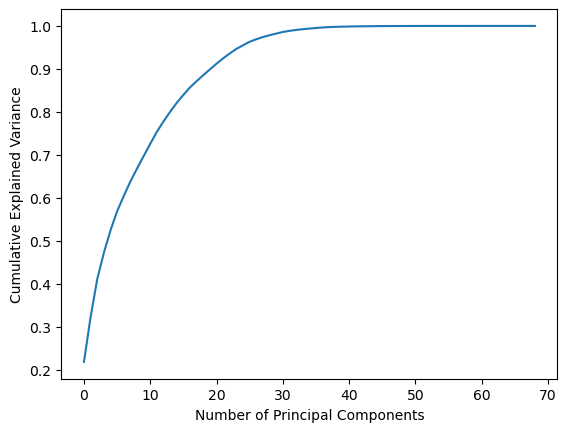

In [49]:
pca_test = PCA().fit(data_scaled)
plt.plot(np.cumsum(pca_test.explained_variance_ratio_))
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

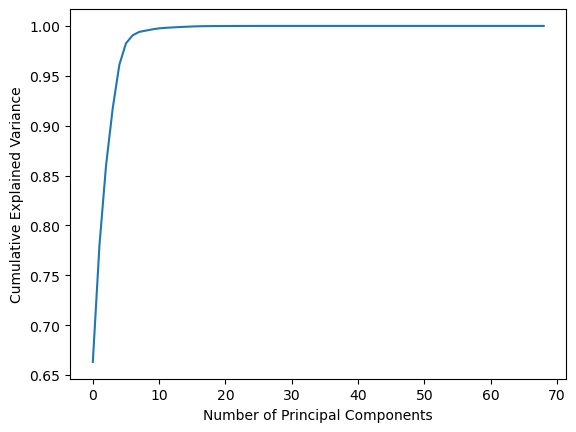

In [50]:
pca_test = PCA().fit(data_no_labels)
plt.plot(np.cumsum(pca_test.explained_variance_ratio_))
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

In [51]:
dimensions_num_for_PCA = 10

In [52]:
def get_PCA_feature_names(num_of_pca_components):
    feature_names = []
    for i in range(num_of_pca_components):    
        feature_names.append(f"PC {i+1}")
    return feature_names

In [53]:
pca = PCA(n_components=dimensions_num_for_PCA)

principal_components = pca.fit(data_no_labels).transform(data_no_labels)

In [54]:
principal_component_headings = get_PCA_feature_names(dimensions_num_for_PCA)

In [55]:
data_pc = pd.DataFrame(data = principal_components, columns = principal_component_headings)
data_pc.head()

PC 1          PC 2          PC 3          PC 4          PC 5  \
0 -3.490283e+07 -3.017339e+06  1.231549e+06 -32336.524168  1.096031e+06   
1 -3.498933e+07 -3.135835e+06  1.023667e+07 -31065.172050  1.053887e+06   
2 -3.491244e+07 -3.030506e+06  2.232118e+06 -32195.263326  1.091349e+06   
3 -3.498933e+07 -3.135835e+06  1.023667e+07 -31065.172155  1.053887e+06   
4 -3.488689e+07 -2.996890e+06 -2.957528e+05 -32676.111550  1.103095e+06   

            PC 6           PC 7           PC 8          PC 9          PC 10  
0 -681189.831369 -359194.168674 -194791.498580  73441.507807 -212433.802324  
1 -664918.127818 -352825.365743 -191883.017788  71826.282496 -211367.252618  
2 -679382.799440 -358487.042567 -194469.443030  73262.073647 -212315.404238  
3 -664918.159256 -352825.343724 -191883.047933  71826.308539 -211367.323407  
4 -684134.220508 -359660.102391 -195115.859632  74044.319000 -211643.608318

In [56]:
data_pc = data_pc.reset_index(drop=True)
data_labels = data_labels.reset_index(drop=True)

In [57]:
data_final = pd.concat([data_pc, data_labels], axis=1, ignore_index=True)

In [58]:
data_final.head()

0             1             2             3             4   \
0 -3.490283e+07 -3.017339e+06  1.231549e+06 -32336.524168  1.096031e+06   
1 -3.498933e+07 -3.135835e+06  1.023667e+07 -31065.172050  1.053887e+06   
2 -3.491244e+07 -3.030506e+06  2.232118e+06 -32195.263326  1.091349e+06   
3 -3.498933e+07 -3.135835e+06  1.023667e+07 -31065.172155  1.053887e+06   
4 -3.488689e+07 -2.996890e+06 -2.957528e+05 -32676.111550  1.103095e+06   

              5              6              7             8              9   \
0 -681189.831369 -359194.168674 -194791.498580  73441.507807 -212433.802324   
1 -664918.127818 -352825.365743 -191883.017788  71826.282496 -211367.252618   
2 -679382.799440 -358487.042567 -194469.443030  73262.073647 -212315.404238   
3 -664918.159256 -352825.343724 -191883.047933  71826.308539 -211367.323407   
4 -684134.220508 -359660.102391 -195115.859632  74044.319000 -211643.608318   

       10  
0  BENIGN  
1  BENIGN  
2  BENIGN  
3  BENIGN  
4  BENIGN

In [59]:
# menggabungkan data dengan label
data_final = pd.concat([data_pc, data_labels], axis = 1)

data_final.head()

PC 1          PC 2          PC 3          PC 4          PC 5  \
0 -3.490283e+07 -3.017339e+06  1.231549e+06 -32336.524168  1.096031e+06   
1 -3.498933e+07 -3.135835e+06  1.023667e+07 -31065.172050  1.053887e+06   
2 -3.491244e+07 -3.030506e+06  2.232118e+06 -32195.263326  1.091349e+06   
3 -3.498933e+07 -3.135835e+06  1.023667e+07 -31065.172155  1.053887e+06   
4 -3.488689e+07 -2.996890e+06 -2.957528e+05 -32676.111550  1.103095e+06   

            PC 6           PC 7           PC 8          PC 9          PC 10  \
0 -681189.831369 -359194.168674 -194791.498580  73441.507807 -212433.802324   
1 -664918.127818 -352825.365743 -191883.017788  71826.282496 -211367.252618   
2 -679382.799440 -358487.042567 -194469.443030  73262.073647 -212315.404238   
3 -664918.159256 -352825.343724 -191883.047933  71826.308539 -211367.323407   
4 -684134.220508 -359660.102391 -195115.859632  74044.319000 -211643.608318   

    label  
0  BENIGN  
1  BENIGN  
2  BENIGN  
3  BENIGN  
4  BENIGN

In [60]:
data_final['label'].value_counts()

BENIGN                        2071935
DoS Hulk                       172846
DDoS                           128014
PortScan                        90694
DoS GoldenEye                   10286
FTP-Patator                      5931
DoS slowloris                    5385
DoS Slowhttptest                 5228
SSH-Patator                      3219
Bot                              1948
Web Attack  Brute Force         1470
Web Attack  XSS                  652
Infiltration                       36
Web Attack  Sql Injection         21
Heartbleed                         11
Name: label, dtype: int64